In [63]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_validate, cross_val_predict, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold


In [64]:
# plot histogramas
def plot_histograms(dataframe):
    columns = dataframe.columns
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 4 > 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3) 
    axes = axes.flatten()
   
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(dataframe[column], ax=ax)
        ax.set_title(f'Histogram of {column}')

        # Calculate the value counts for each category in the column
        value_counts = dataframe[column].value_counts()
        total_count = len(dataframe[column])
        
        # Sort and select the top 5 values
        top_5 = value_counts.head(5)

        # Annotate the top 5 bars with their percentage
        for val, count in top_5.items():
            percentage = (count / total_count) * 100
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(val, count), 
                        xytext=(0, 2),  # Offset text slightly above the bar
                        textcoords='offset points', 
                        ha='center', 
                        color='black')

    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])       
    plt.show()
    
def describe_categorical_variables(data):
    categorical_cols = data.select_dtypes(include=['object']).columns
    categorical_stats = pd.DataFrame(index=categorical_cols, columns=['Unique Values', 'Count', 'Top_Frequency', 'Top'])
    for col in categorical_cols:
        unique_values = data[col].unique()
        unique_count = len(unique_values)
        top_value = data[col].mode().iloc[0]
        top_freq = data[col].value_counts().iloc[0]/len(data)
        categorical_stats.loc[col] = [unique_values, unique_count, top_freq, top_value]
    return categorical_stats

In [65]:
def plot_top10(dataframe):
    columns = dataframe.columns
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3) 
    axes = axes.flatten()
   
    for i, column in enumerate(columns):
        ax = axes[i]

        # Calculate the value counts for each category in the column and select the top 10
        value_counts = dataframe[column].value_counts().head(10)
        top_10_categories = value_counts.index

        # Filter the dataframe to include only the top 10 categories
        filtered_data = dataframe[column][dataframe[column].isin(top_10_categories)]

        # Plot the filtered data with the counts for each of the top 10 categories
        sns.histplot(filtered_data, ax=ax, discrete=True)

        # Set the title with the column name
        ax.set_title(f'Histogram of {column} (Top 10 Categories)')

        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)

        # Annotate the top 10 bars with their percentage
        total_count = len(dataframe[column])
        for val, count in value_counts.items():
            percentage = (count / total_count) * 100
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(val, count), 
                        xytext=(0, 2),  # Offset text slightly above the bar
                        textcoords='offset points', 
                        ha='center', 
                        color='black')

    # Remove any extra axes if there are more subplots than columns
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])       
    plt.show()

In [66]:

def plot_boxplots_vscat(dataframe, target_continuous):
    # Select categorical columns
    cat_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    num_cols = len(cat_columns)
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)

    # Create subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  
    axes = axes.flatten()

    # Iterate through each categorical column and plot it against the target continuous variable
    for i, column in enumerate(cat_columns):
        ax = axes[i]
        sns.boxplot(x=dataframe[column], y=dataframe[target_continuous], ax=ax)
        ax.set_title(f'Boxplot of {target_continuous} vs {column}')
        ax.set_xlabel(column)
        ax.set_ylabel(target_continuous)
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Remove any extra subplots if there are more subplots than columns
    for i in range(num_cols, num_rows * 2):
        fig.delaxes(axes[i])

    plt.show()

In [67]:
def plot_hist(variable):
    plt.figure(figsize=(12, 5))
    plt.tight_layout()
    ax = sns.histplot(x=variable, discrete=True)
    
    # Calculate the total count for percentages
    total_count = len(variable)
    
    # Annotate each bar with its count and percentage
    for p in ax.patches:
        count = int(p.get_height())
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.1f}%)',  # Display count and percentage
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Set x-ticks to unique values to avoid additional ticks
    unique_vals = sorted(variable.unique())
    ax.set_xticks(unique_vals)
    ax.set_xticklabels(unique_vals, rotation=30, horizontalalignment='right')
    
    plt.show()

In [68]:
import ipywidgets as widgets
from IPython.display import display

def dropdown_features(df, default=None):
    feature_names = list(df.columns)
    
    # Set the default value to the provided default or the first column if none is specified
    default_value = default if default in feature_names else feature_names[0]
    
    # Create a dropdown widget
    ft_dropdown = widgets.Dropdown(
        options=feature_names,
        value=default_value,  
        description='Variable:',
        disabled=False,
    )
    
    def on_dropdown_change(change):
        global selection
        selection = df[change.new]    
        
    # Attach the function to the dropdown's change event
    ft_dropdown.observe(on_dropdown_change, names='value')
    
    # Display the dropdown
    display(ft_dropdown)

### Diccionario de Datos
- **work_year**: The year the salary was paid.
- **experience_level**: The experience level in the job during the year with the following possible values:
    - **EN**: Entry-level / Junior
    - **MI**: Mid-level / Intermediate
    - **SE**: Senior-level / Expert
    - **EX**: Executive-level / Director
- **employment_type**: The type of employment for the role:
    - **PT**: Part-time
    - **FT**: Full-time
    - **CT**: Contract
    - **FL**: Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
- **employee_residence**: Employee's primary country of residence during the work year as an ISO 3166 country code.
- **remote_ratio**:
  - **description**: The overall amount of work done remotely, possible values are as follows:
    - **0**: No remote work (less than 20%)
    - **50**: Partially remote/hybrid
    - **100**: Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year:
    - **S**: less than 50 employees (small)
    - **M**: 50 to 250 employees (medium)
    - **L**: more than 250 employees (large)

### 1. Carga de los datos


In [69]:
data_raw = pd.read_csv('Data/salaries.csv')
data_raw.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Associate,167500,USD,167500,US,0,US,M
1,2024,MI,FT,Associate,106500,USD,106500,US,0,US,M
2,2024,SE,FT,Data Engineer,183300,USD,183300,US,0,US,M


In [70]:
from ydata_profiling import ProfileReport
#profile151024 = ProfileReport(data_raw, title="Reporte Datos Salarios", explorative=True)

# display report 
#profile.to_notebook_iframe()

# Export  report to  HTML 
#profile151024.to_file("data_salarios_report151024.html")

#### 2. Exploración y Perfilamiento de Datos

##### Separación Muestra de Evaluación
Siguiendo el ciclo de machine learning, antes de explorar los datos se separa una parte del conjunto de datos (85%) que nos servirá para evaluar los modelos construidos. Random State = 77

In [71]:
# test sample
data, eva = train_test_split(data_raw, test_size=0.15, random_state=77)
data.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
53287,2022,SE,FT,Data Engineer,130000,USD,130000,US,100,US,M
29733,2024,MI,FT,Data Scientist,111740,USD,111740,US,0,US,M
23692,2024,SE,FT,Data Scientist,115000,USD,115000,US,100,US,M


In [72]:
data_exc_salary = data.loc[:, ~data.columns.isin(['salary', 'salary_in_usd'])]

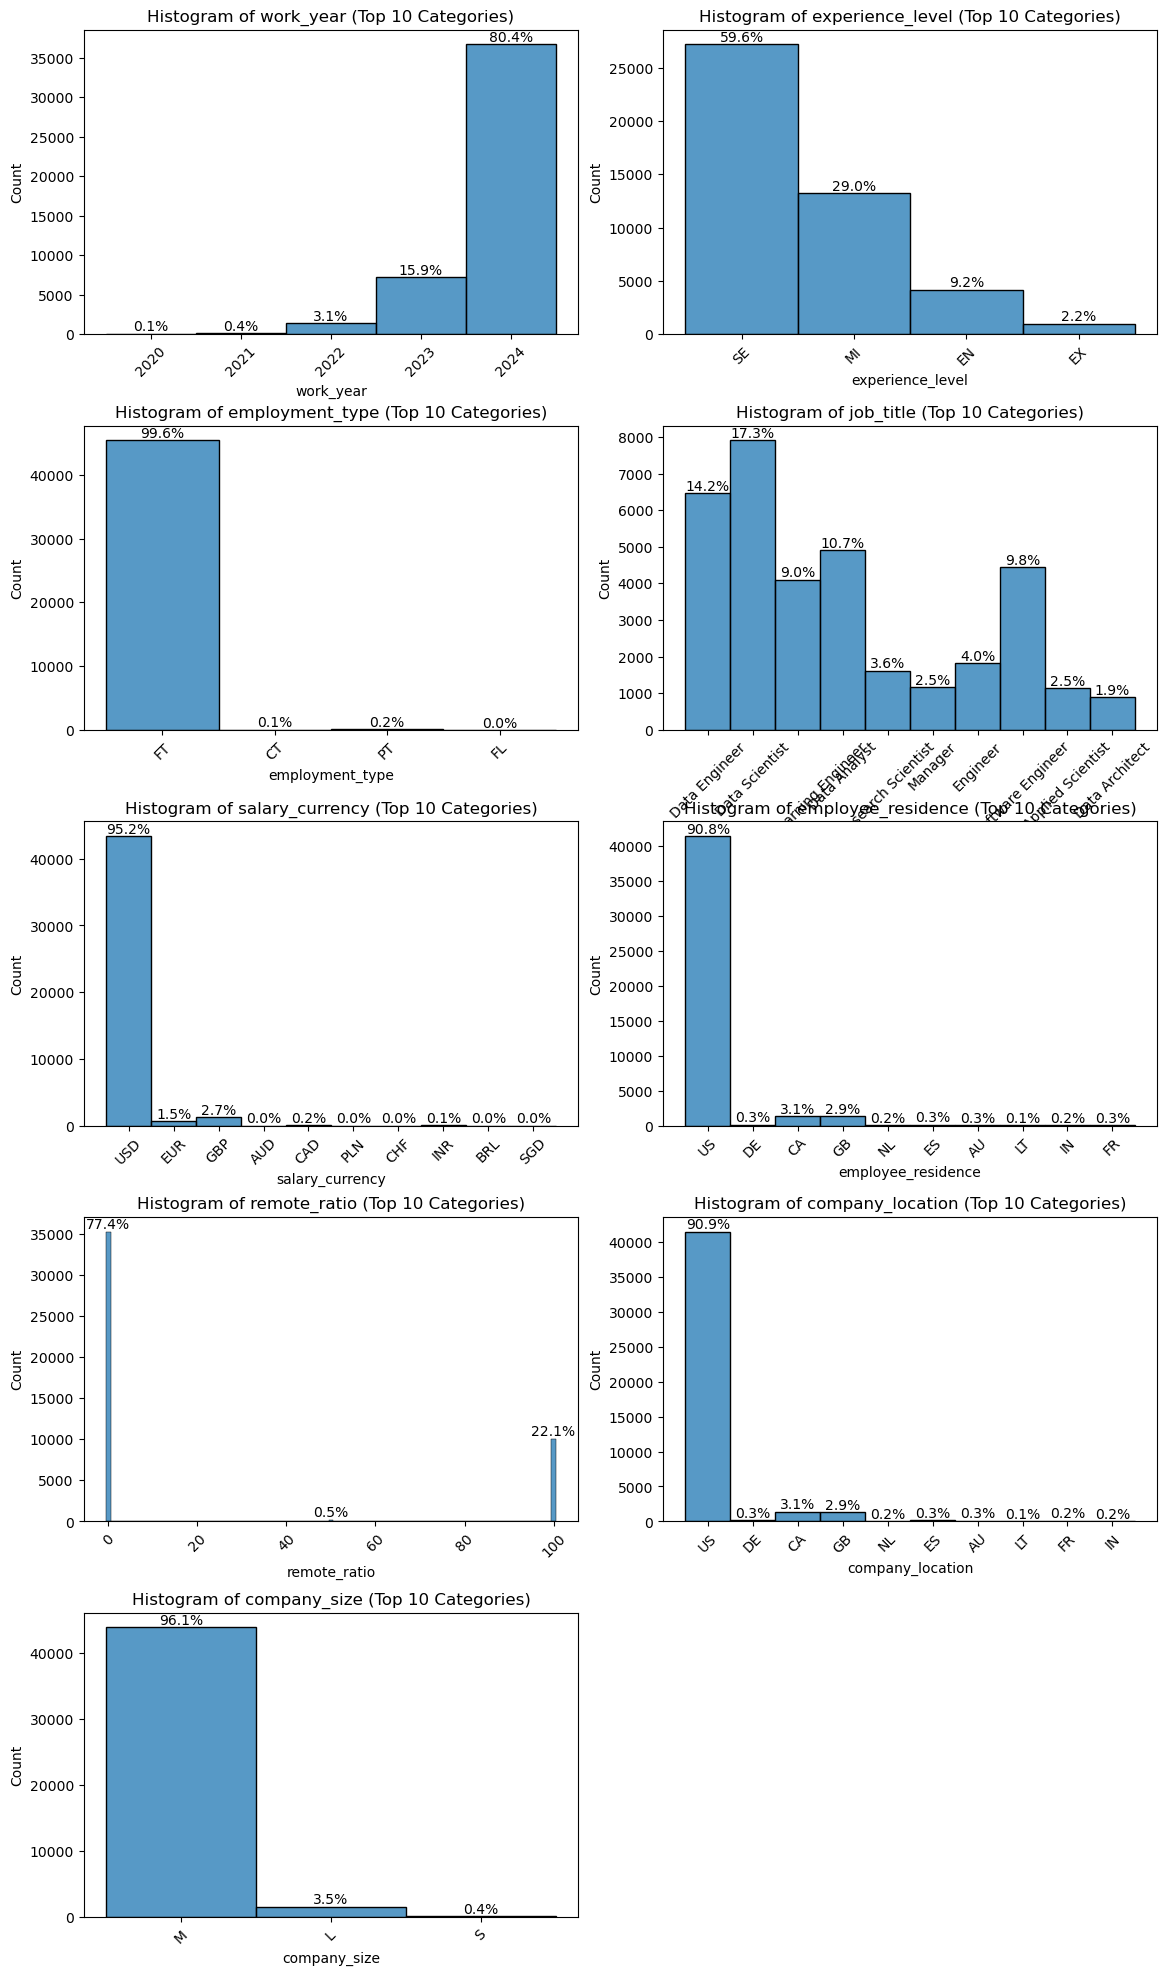

In [73]:
plot_top10(data_exc_salary)

In [74]:
top_10_jobs = data['job_title'].value_counts().head(10)
top_10_jobs

job_title
Data Scientist               7915
Data Engineer                6466
Data Analyst                 4900
Software Engineer            4450
Machine Learning Engineer    4102
Engineer                     1831
Research Scientist           1621
Manager                      1161
Applied Scientist            1140
Data Architect                886
Name: count, dtype: int64

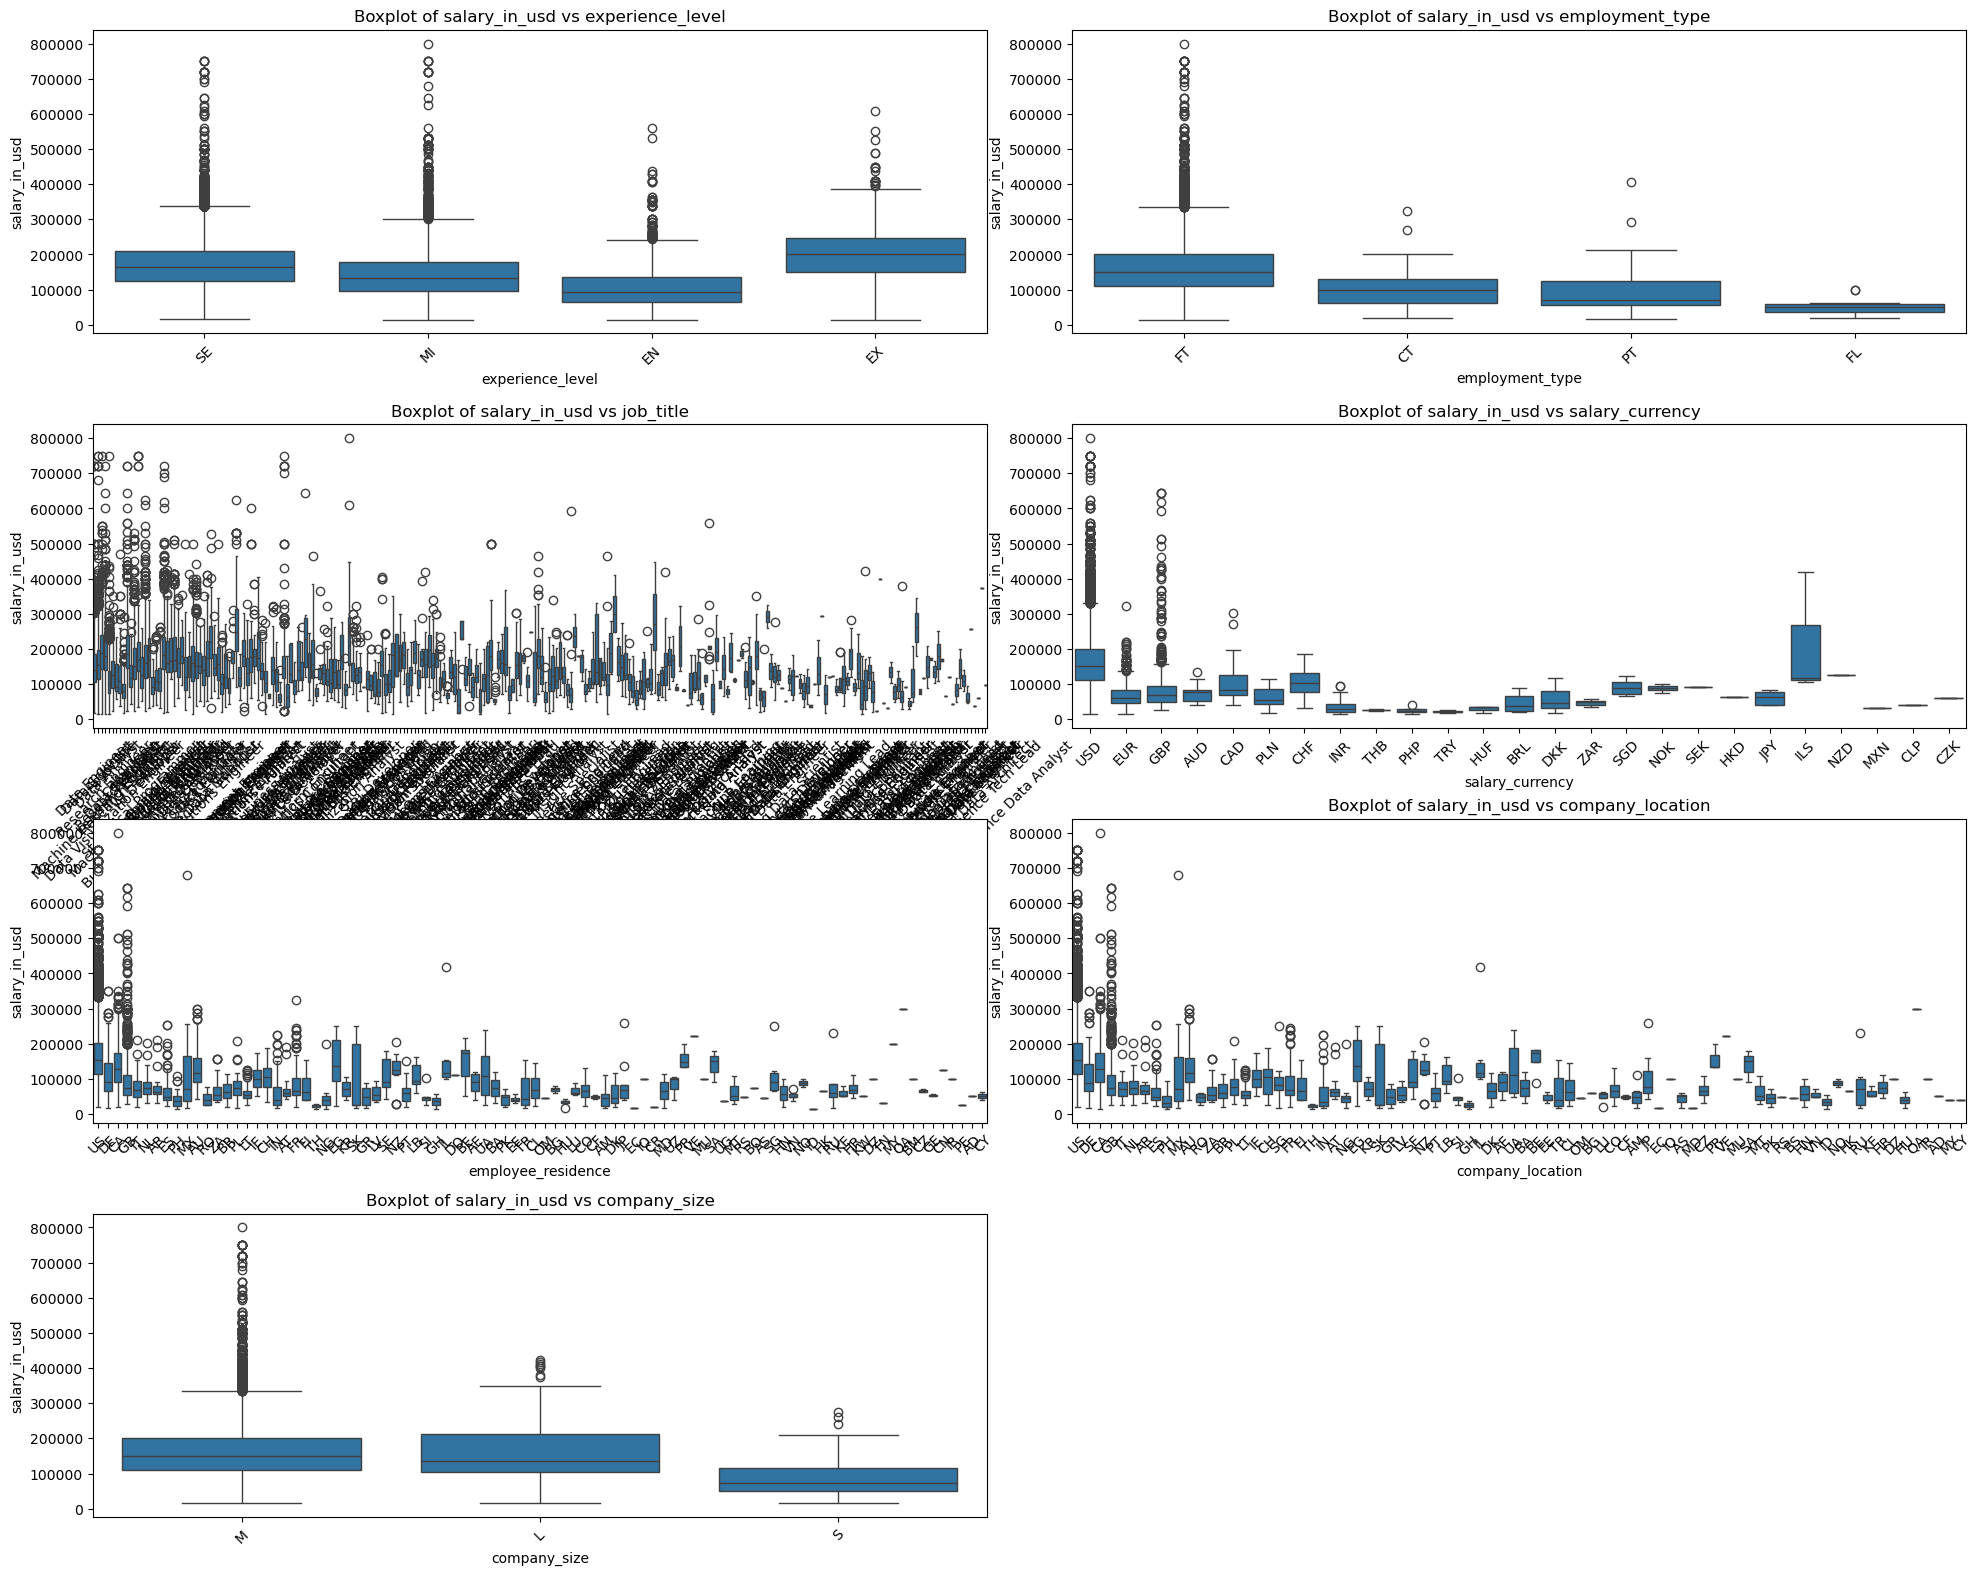

In [75]:
plot_boxplots_vscat(data,"salary_in_usd")

In [76]:
dropdown_features(data)

Dropdown(description='Variable:', options=('work_year', 'experience_level', 'employment_type', 'job_title', 's…

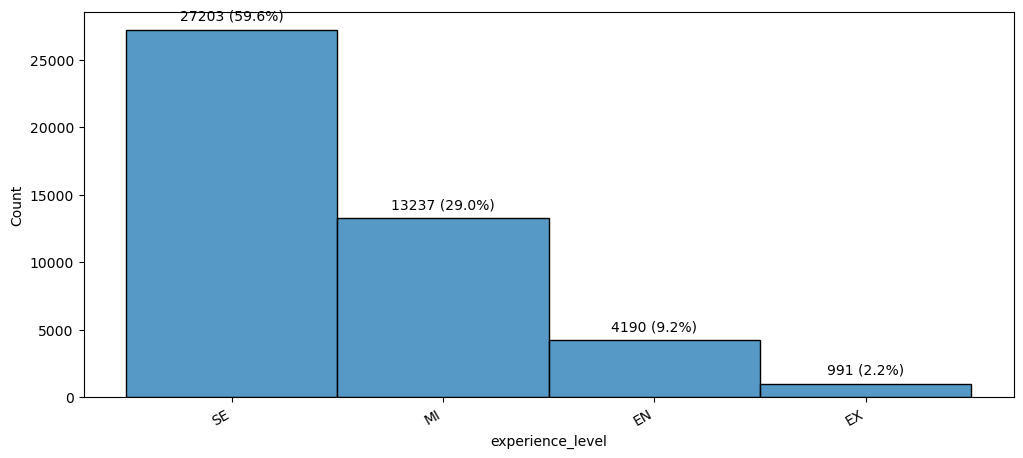

In [77]:
plot_hist(selection)

### NOTA: Incluir aqui Análisis de los datos, o hacerlo en un documento separado

#### 3. Limpieza y Preparación de los Datos

In [78]:
#!pip install -q pycountry-convert

In [79]:
# Función para agrupar company_location y employee_residency
import pycountry_convert as pc
def get_continent(col):
    try:
        if len(col) == 2:
            country_code = col
        else:
            country_code = pc.country_name_to_country_alpha2(col.strip('\'"'))
        continent_name = pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(country_code))
        return continent_name
    except:
        return None


In [80]:
# 1. Eliminación duplicados
data = data.drop_duplicates() 
# 2. Filtrar año 2024
data = data.loc[data["work_year"] == 2024] 
 # 3. descartar columnas innecesarias
columns_to_drop = ['work_year', 'salary', 'salary_currency']
data = data.drop(columns=columns_to_drop)
# 4. Correccion employment_type = FL cambiarlo por FT
data['employment_type'] = data['employment_type'].replace('FL', 'FT')
# 5. Agrupar company_location y employee_residency en continentes
data['company_location']=data['company_location'].apply(lambda x: get_continent(x))
data['employee_residence']=data['employee_residence'].apply(lambda x: get_continent(x))
data.shape

(17879, 8)

In [81]:
# 6. filtrar los datos para 10 posiciones mas populares
top_10_titles = data['job_title'].value_counts().nlargest(10).index
data_top10 = data[data['job_title'].isin(top_10_titles)]
data_top10.shape

(11409, 8)

In [82]:
# Función tratamiento de valores anómalos
def remove_outliers(df, column_name, threshold=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [83]:
# Tratamiento de valores anómalos
data_top10 = remove_outliers(data_top10, 'salary_in_usd')
data_top10.shape

(11193, 8)

In [84]:
# Cross-tabulation between company_location and employee_residence
location_comparison = pd.crosstab(data['company_location'], data['employee_residence'])
location_comparison

employee_residence,Africa,Asia,Europe,North America,Oceania,South America
company_location,,,,,,
Africa,47,0,0,1,0,0
Asia,0,90,0,0,0,0
Europe,0,0,1070,1,0,0
North America,0,1,0,16513,0,0
Oceania,0,0,0,0,107,0
South America,0,0,0,0,0,49


In [85]:
different_locations = data_top10[data_top10['company_location'] != data_top10['employee_residence']]
print(f"Número de ubicaciones diferentes: {len(different_locations)}")

Número de ubicaciones diferentes: 1


In [86]:
location_comparison_top10 = pd.crosstab(data_top10['company_location'], data_top10['employee_residence'])
location_comparison_top10

employee_residence,Africa,Asia,Europe,North America,Oceania,South America
company_location,,,,,,
Africa,31,0,0,0,0,0
Asia,0,55,0,0,0,0
Europe,0,0,699,1,0,0
North America,0,0,0,10296,0,0
Oceania,0,0,0,0,73,0
South America,0,0,0,0,0,38


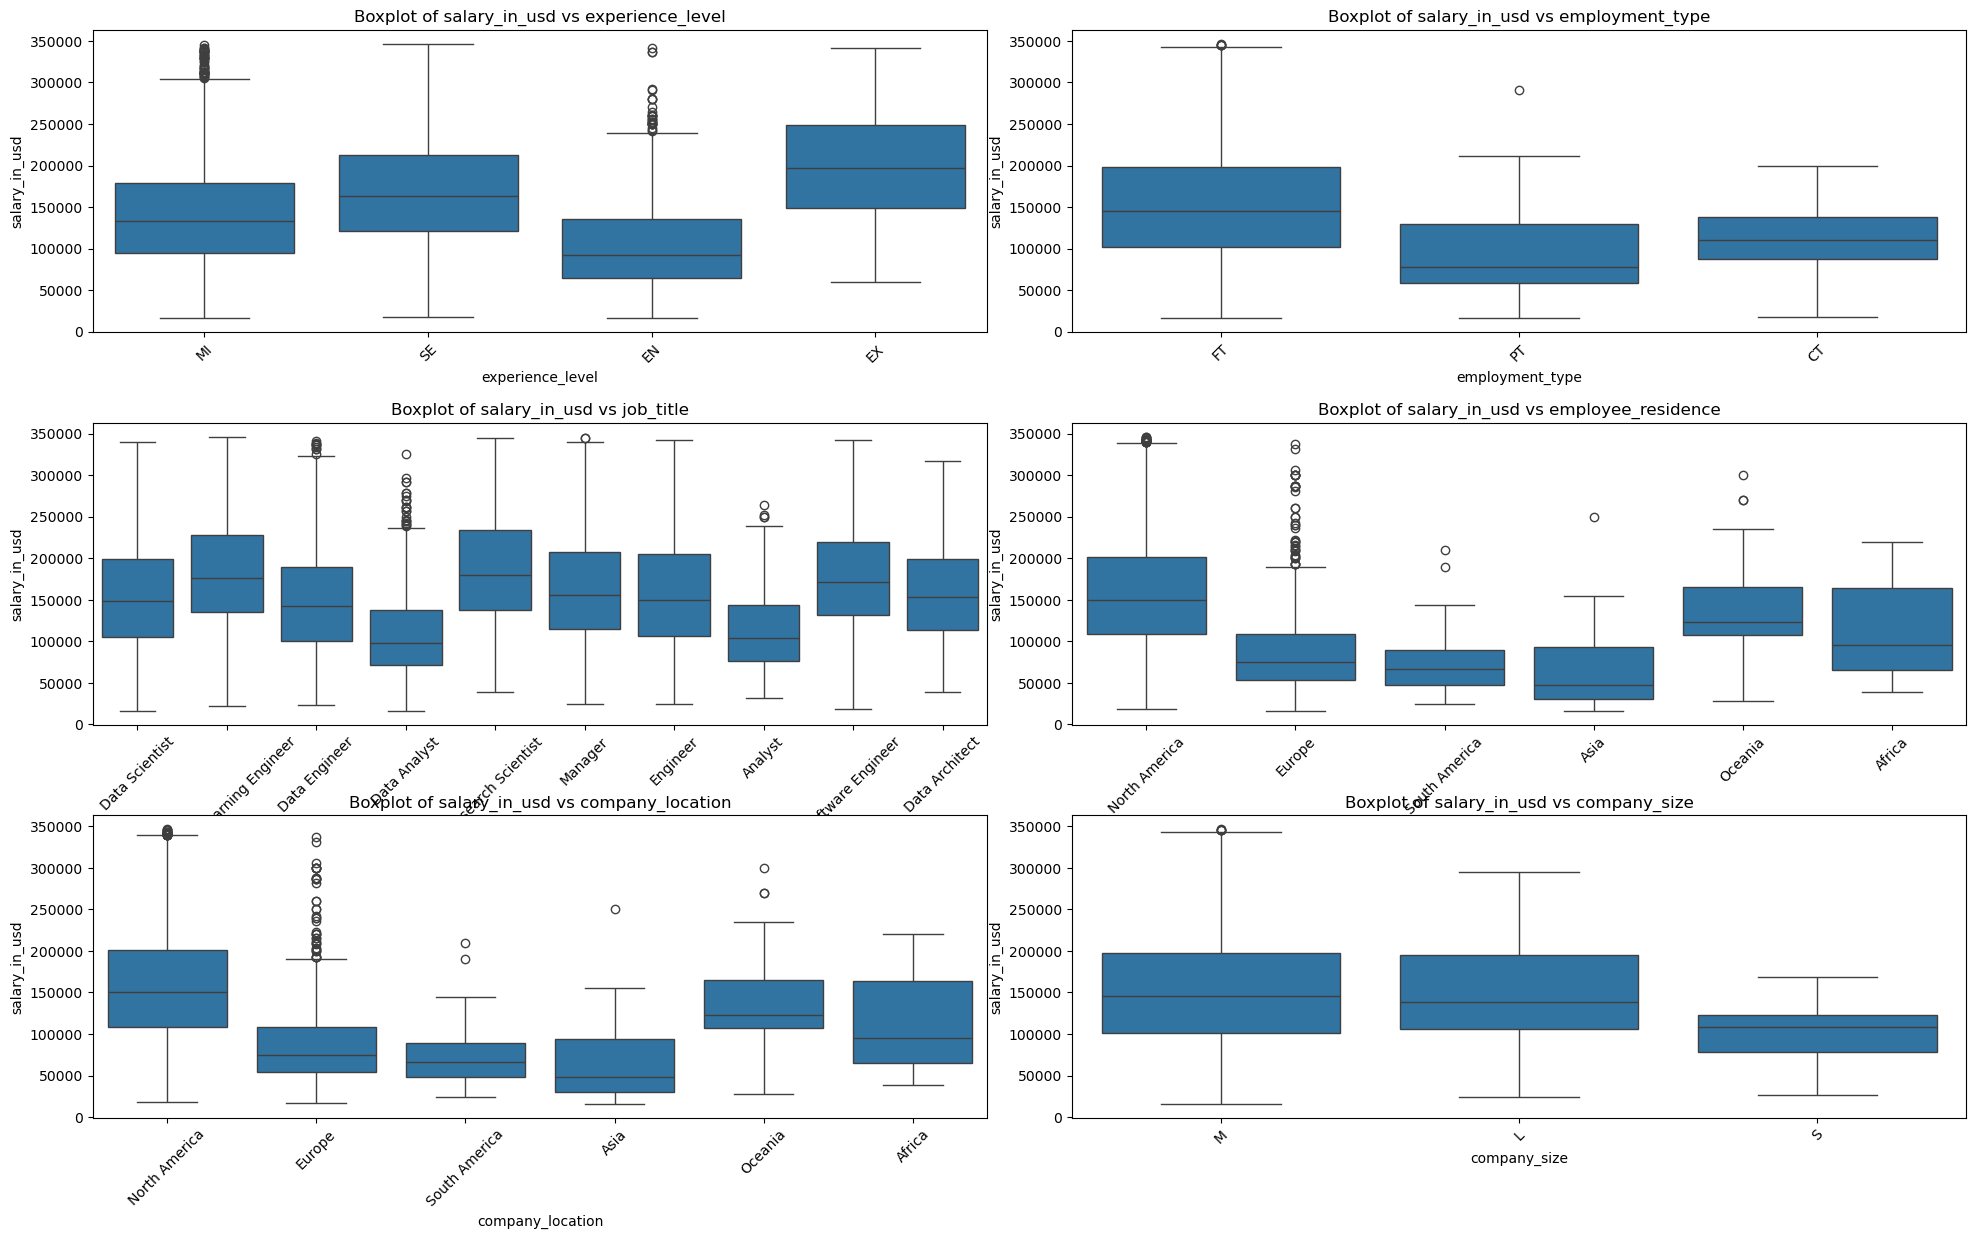

In [87]:
plot_boxplots_vscat(data_top10,"salary_in_usd")

In [88]:
# Saving to CSV
#data_top10.to_csv('data_top10.csv', index=False)

#### 4. Alternativas para el manejo del problema de regresión como clasificacion:

In [103]:
def tablas_contingencia(dataframe, target):
    tablas_contingencia = {}
    for column in dataframe.columns:
        if column != target and dataframe[column].dtype == 'object':
            # Create a contingency table using pd.crosstab()
            tabla = pd.crosstab(dataframe[column], dataframe[target])
            # Store the table in the dictionary with the column name as the key
            tablas_contingencia[column] = tabla
    return tablas_contingencia

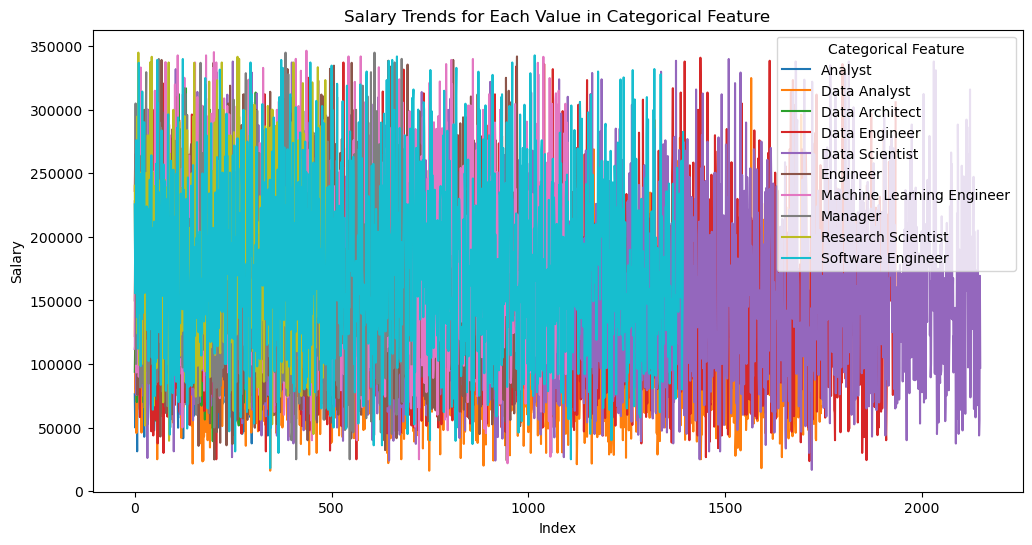

In [89]:
# Sort or group data by the categorical feature
grouped = data_top10.groupby('job_title')['salary_in_usd'].apply(list)

# Plot each category as a line
plt.figure(figsize=(12, 6))
for category, salaries in grouped.items():
    plt.plot(salaries, label=category)  # Each category as a separate line

plt.title('Salary Trends for Each Value in Categorical Feature')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.legend(title='Categorical Feature')
plt.show()

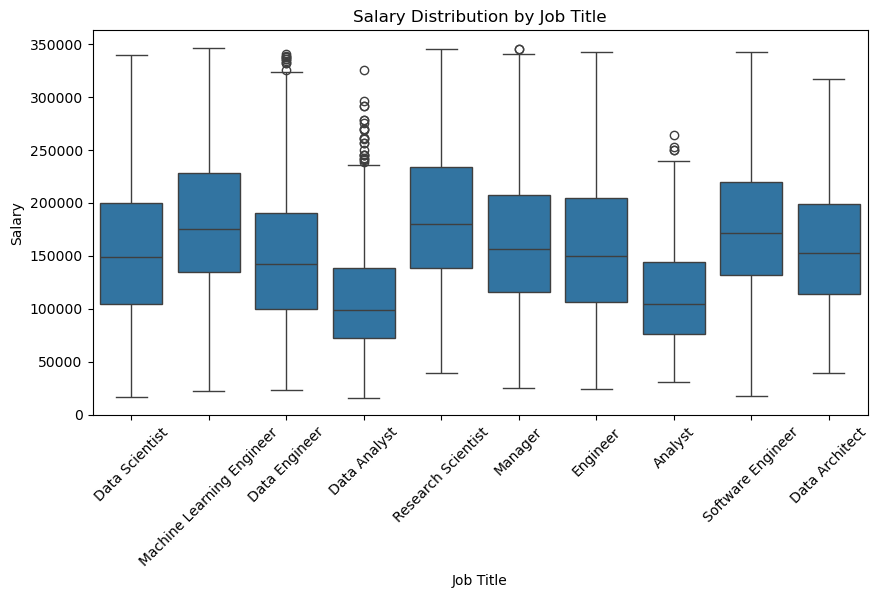

In [100]:
# Boxplot job_tilte vs. Salary
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_top10, x='job_title', y='salary_in_usd')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=45)  
plt.show()

In [109]:
data_top10.describe()

,salary_in_usd,remote_ratio
count,11193.000000,11193.000000
mean,153545.911373,21.857411
std,66652.954537,41.300002
min,16000.000000,0.000000
25%,101520.000000,0.000000
50%,145000.000000,0.000000
75%,198000.000000,0.000000
max,346500.000000,100.000000


In [91]:
# Calculate the lower and upper quartiles for each job title
quartiles = data_top10.groupby('job_title')['salary_in_usd'].quantile([0.25, 0.75]).unstack()
quartiles.columns = ['Lower Quartile (Q1)', 'Upper Quartile (Q3)']
quartiles

,Lower Quartile (Q1),Upper Quartile (Q3)
job_title,,
Analyst,76437.5,144012.5
Data Analyst,71958.0,138000.0
Data Architect,113762.5,199325.0
Data Engineer,100052.5,190000.0
Data Scientist,104922.0,199700.0
Engineer,106080.0,205000.0
Machine Learning Engineer,135000.0,227800.0
Manager,115450.0,207250.0
Research Scientist,138000.0,234000.0


#### 4.1 Opcion 1: Clases = Rangos de salarios

In [92]:
# función para clasificar rangos de salarios
def classify_salary(salary):
    if salary < 75000:
        return 'Bajo'
    elif 75000 <= salary < 120000:
        return 'Medio_Bajo'
    elif 120000 <= salary < 180000:
        return 'Medio_Alto'
    else:
        return 'Alto'

In [93]:
# Mapeo Opcion 1 salary_class
data_top10['salary_class'] = data_top10['salary_in_usd'].apply(classify_salary)
data_top10.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class
29733,MI,FT,Data Scientist,111740,North America,0,North America,M,Medio_Bajo
23692,SE,FT,Data Scientist,115000,North America,100,North America,M,Medio_Bajo
39047,SE,FT,Machine Learning Engineer,112000,North America,0,North America,M,Medio_Bajo


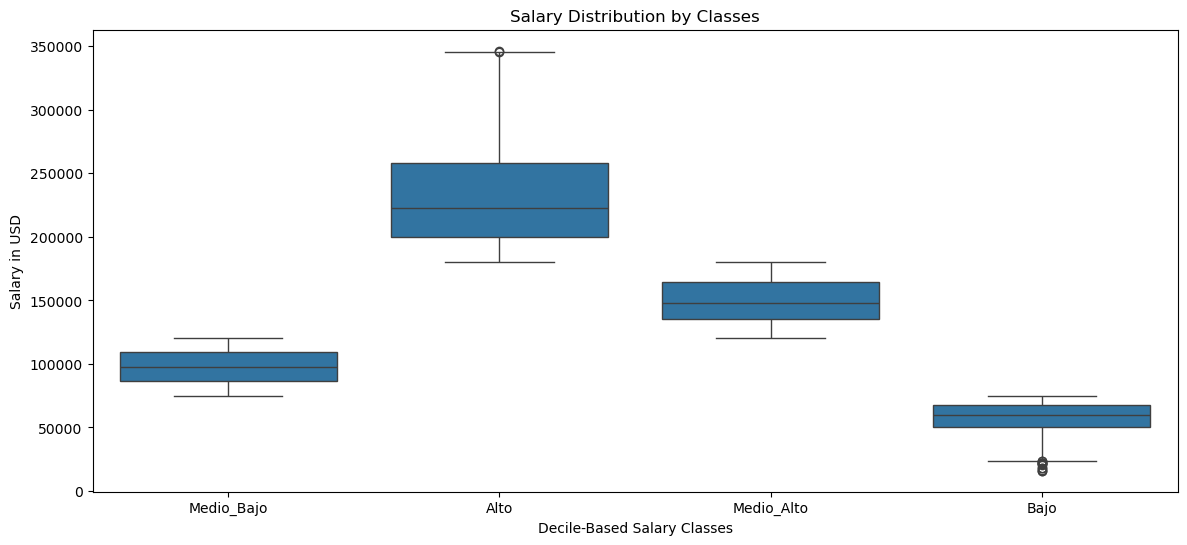

In [97]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_top10, x='salary_class', y='salary_in_usd')
plt.title('Salary Distribution by Classes')
plt.xlabel('Decile-Based Salary Classes')
plt.ylabel('Salary in USD')
plt.show()

#### 4.2 Opcion 2: Clases = Deciles

In [94]:
# función para mapear salarios en deciles
deciles = data_top10['salary_in_usd'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Step 2: Define function to classify based on deciles
def classify_salary_deciles(salary):
    if salary <= deciles[0.1]:
        return 'D1'
    elif deciles[0.1] < salary <= deciles[0.2]:
        return 'D2'
    elif deciles[0.2] < salary <= deciles[0.3]:
        return 'D3'
    elif deciles[0.3] < salary <= deciles[0.4]:
        return 'D4'
    elif deciles[0.4] < salary <= deciles[0.5]:
        return 'D5'
    elif deciles[0.5] < salary <= deciles[0.6]:
        return 'D6'
    elif deciles[0.6] < salary <= deciles[0.7]:
        return 'D7'
    elif deciles[0.7] < salary <= deciles[0.8]:
        return 'D8'
    elif deciles[0.8] < salary <= deciles[0.9]:
        return 'D9'
    else:
        return 'D10'

In [95]:
# Mapear 
data_top10['salary_deciles'] = data_top10['salary_in_usd'].apply(classify_salary_deciles)
data_top10.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_class,salary_deciles
29733,MI,FT,Data Scientist,111740,North America,0,North America,M,Medio_Bajo,D4
23692,SE,FT,Data Scientist,115000,North America,100,North America,M,Medio_Bajo,D4
39047,SE,FT,Machine Learning Engineer,112000,North America,0,North America,M,Medio_Bajo,D4


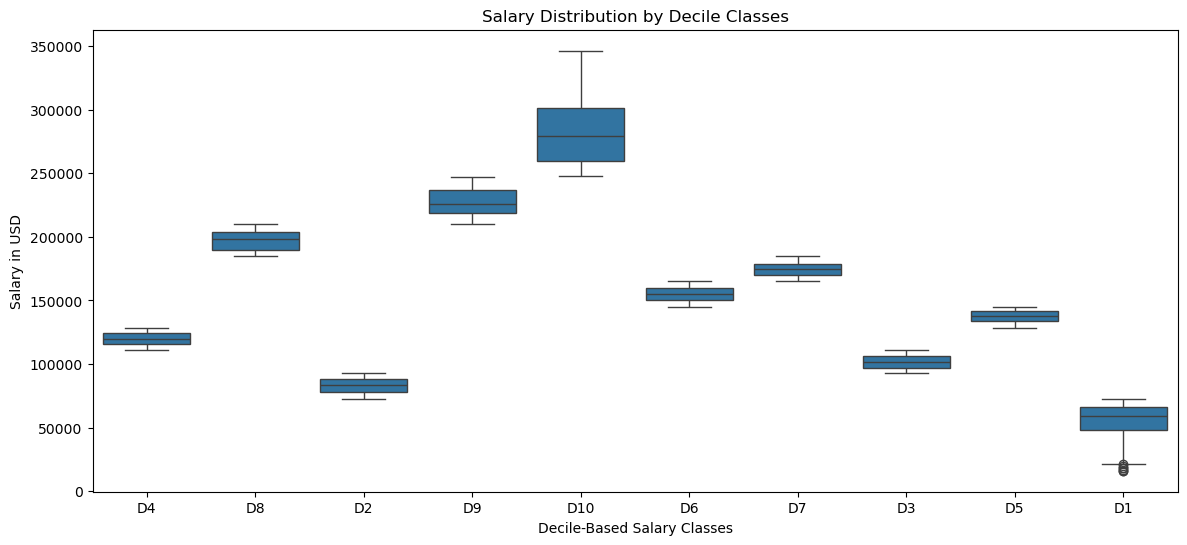

In [96]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_top10, x='salary_deciles', y='salary_in_usd')
plt.title('Salary Distribution by Decile Classes')
plt.xlabel('Decile-Based Salary Classes')
plt.ylabel('Salary in USD')
plt.show()

#### Tablas de Contingencia

In [104]:
tablas_con_sal_class = tablas_contingencia(data_top10, 'salary_class')
tablas_con_sal_dec = tablas_contingencia(data_top10, 'salary_deciles')

In [106]:
# Tabla Contigencia job_title vs. salary_class
cont_job_title_cls = tablas_con_sal_class['job_title']
cont_job_title_cls

salary_class,Alto,Bajo,Medio_Alto,Medio_Bajo
job_title,,,,
Analyst,37,76,98,129
Data Analyst,152,477,464,652
Data Architect,114,15,132,91
Data Engineer,574,209,658,493
Data Scientist,696,201,735,517
Engineer,349,92,311,229
Machine Learning Engineer,532,36,379,154
Manager,261,37,247,159
Research Scientist,251,13,161,68


In [107]:

# Tabla Contigencia job_title vs. salary_deciles
cont_job_title_dec = tablas_con_sal_dec['job_title']
cont_job_title_dec

salary_deciles,D1,D10,D2,D3,D4,D5,D6,D7,D8,D9
job_title,,,,,,,,,,
Analyst,72,4,67,51,35,34,33,18,20,6
Data Analyst,449,16,339,248,180,158,143,100,62,50
Data Architect,14,38,29,40,43,33,42,44,34,35
Data Engineer,188,140,206,212,205,196,191,203,207,186
Data Scientist,190,209,192,228,218,205,237,217,224,229
Engineer,84,124,96,87,110,94,83,105,98,100
Machine Learning Engineer,29,196,43,64,103,126,114,115,147,164
Manager,36,98,56,70,75,76,77,65,81,70
Research Scientist,9,90,22,27,40,50,37,71,67,80


#### 5. Modelos

In [108]:
#pip install catboost

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 10.6 MB/s eta 0:00:00a 0:00:01
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 11.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
